In [8]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [9]:
train=ImageDataGenerator(rescale=1/255,rotation_range=10,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1,
                        shear_range=0.15,zoom_range=0.1,channel_shift_range=10)

In [16]:
train_set=train.flow_from_directory('Face_Mask_Dataset/Train',
                                    target_size=(200,200),
                                    batch_size=100,
                                    class_mode='categorical'
                                   )

validation_set=train.flow_from_directory('Face_Mask_Dataset/Validation',
                                        target_size=(200,200),
                                        class_mode='categorical'
                                        )

Found 10002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [17]:
img,labels=next(train_set)
train_set.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [18]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(3,3),
    
    tf.keras.layers.Conv2D(64,(4,4),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(3,3),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('MASKV1.h5', save_freq=100)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [20]:
training=model.fit(train_set,
                   shuffle=True,
                  epochs=5,
                  validation_data=validation_set,callbacks=[checkpoint])

Epoch 1/5
101/101 [==============================] - 485s 5s/step - loss: 0.2541 - accuracy: 0.9068 - val_loss: 0.0834 - val_accuracy: 0.9663
Epoch 2/5
101/101 [==============================] - 331s 3s/step - loss: 0.1010 - accuracy: 0.9669 - val_loss: 0.0944 - val_accuracy: 0.9675
Epoch 3/5
101/101 [==============================] - 310s 3s/step - loss: 0.0853 - accuracy: 0.9693 - val_loss: 0.0652 - val_accuracy: 0.9775
Epoch 4/5
101/101 [==============================] - 310s 3s/step - loss: 0.1337 - accuracy: 0.9517 - val_loss: 0.0971 - val_accuracy: 0.9650
Epoch 5/5
101/101 [==============================] - 296s 3s/step - loss: 0.1072 - accuracy: 0.9617 - val_loss: 0.0912 - val_accuracy: 0.9638


In [10]:
model.save("mask.h5")

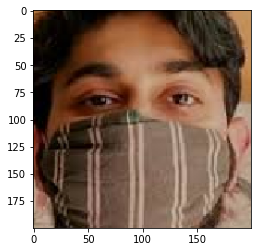

wearing mask


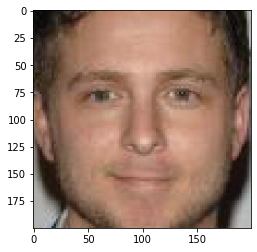

not wearing mask


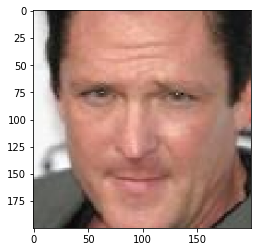

not wearing mask


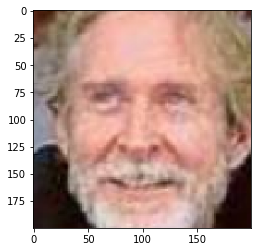

not wearing mask


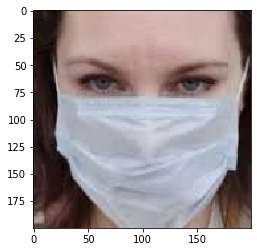

wearing mask


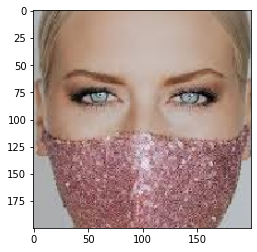

wearing mask


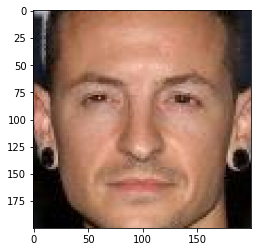

not wearing mask


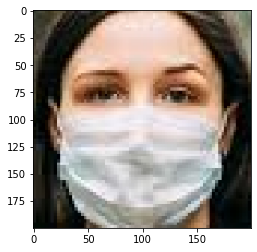

wearing mask


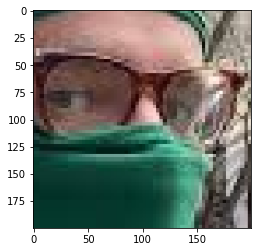

wearing mask


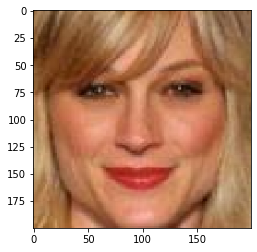

not wearing mask


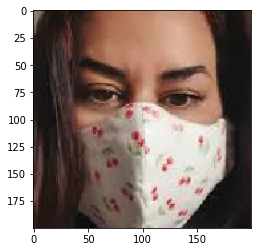

wearing mask


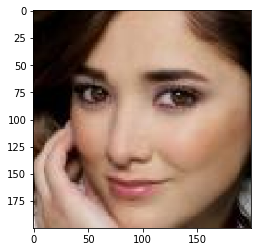

not wearing mask


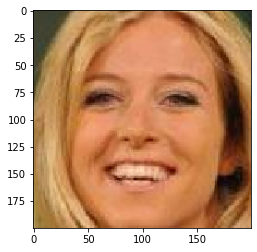

not wearing mask


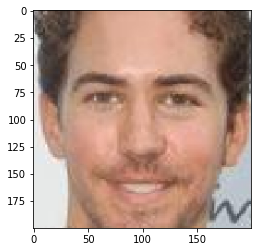

not wearing mask


In [21]:
import os

test_dir="Face_Mask_Dataset/Test"

for i in os.listdir(test_dir):
    img=image.load_img(test_dir+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    predictions=model.predict(images)
    
    if np.argmax(predictions)==1:
        print('not wearing mask')
    else:
        print('wearing mask')